In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
sns.set(style='darkgrid')
sns.set(font="Tahoma")
import numpy as np


## Clean Data

In [202]:
df = pd.read_csv('nacc_0-19.csv')
df = df.append(pd.read_csv('nacc_20-99.csv'))
df = df.append(pd.read_csv('nacc_100-103.csv'))
df = df.append(pd.read_csv('nacc_105-134.csv'))
del df['Unnamed: 0']
df["case"] = df.case.fillna('-')

def receive(x):
    result = x.strip()[-10:]
    print(result)
    if result == ' รับวันที่':
        return np.nan
    return result
df['num_receive'] = df.receive.apply(lambda x: x.strip()[10:-21])
df['date_receive'] = df.receive.apply(receive)
del df["receive"]
df = df.dropna(subset=['date_receive'])
df["date_receive"] = df["date_receive"].apply(lambda s: s[:-4] + str(int(s[-4:])-543))
df["date_receive"] = pd.to_datetime(df["date_receive"], format="%d/%m/%Y")
# df.to_csv("nacc_all.csv")

10/10/2560
26/09/2560
24/09/2558
24/09/2558
24/09/2558
24/09/2558
24/09/2558
31/10/2560
07/11/2560
25/10/2560
 รับวันที่
13/09/2559
09/11/2559
18/05/2560
03/03/2560
26/12/2559
 รับวันที่
09/05/2546
18/04/2546
23/06/2560
19/06/2560
19/06/2560
16/06/2560
19/06/2560
21/03/2560
 รับวันที่
 รับวันที่
 รับวันที่
 รับวันที่
 รับวันที่
 รับวันที่
 รับวันที่
 รับวันที่
03/11/2559
28/03/2560
24/03/2560
03/04/2560
03/04/2560
03/04/2560
 รับวันที่
 รับวันที่
09/02/2560
29/12/2559
 รับวันที่
14/03/2560
28/10/2559
16/09/2559
18/04/2560
18/04/2560
18/04/2560
18/04/2560
18/04/2560
18/04/2560
18/04/2560
 รับวันที่
05/06/2556
30/09/2551
02/03/2560
03/10/2559
06/08/2552
 รับวันที่
17/05/2560
07/11/2559
29/05/2560
29/05/2560
25/04/2560
 รับวันที่
16/05/2560
16/05/2560
15/05/2560
27/03/2560
07/06/2560
09/09/2559
05/06/2560
06/10/2559
 รับวันที่
 รับวันที่
 รับวันที่
 รับวันที่
 รับวันที่
 รับวันที่
07/09/2560
28/07/2557
19/04/2560
12/01/2560
17/02/2559
18/12/2558
04/04/2559
19/11/2558
30/09/2558
07/03/2559

10/08/2555
10/08/2555
10/08/2555
10/08/2555
10/08/2555
10/08/2555
10/08/2555
08/03/2555
02/08/2554
05/07/2555
27/12/2553
14/01/2554
29/12/2553
27/12/2553
22/11/2553
09/11/2553
03/11/2553
03/03/2554
14/02/2554
03/02/2554
30/12/2553
23/12/2553
01/11/2553
18/10/2553
31/03/2554
01/02/2554
05/01/2554
28/12/2553
11/11/2553
18/10/2553
18/10/2553
08/10/2553
10/08/2554
07/07/2554
25/07/2554
17/02/2554
17/02/2554
15/11/2553
26/09/2554
05/07/2554
09/05/2554
16/09/2554
10/06/2554
17/01/2554
27/09/2553
28/03/2554
14/03/2554
29/10/2553
12/01/2554
08/12/2553
27/06/2554
21/06/2554
08/04/2554
30/05/2554
30/09/2554
15/06/2554
14/09/2553
26/08/2554
13/12/2553
14/12/2553
28/02/2554
27/01/2554
25/01/2554
26/10/2553
13/10/2553
19/01/2554
18/01/2554
21/01/2554
24/12/2553
09/12/2553
27/09/2553
17/09/2553
14/09/2553
18/11/2553
27/10/2553
26/10/2553
20/10/2553
02/02/2554
01/02/2554
31/01/2554
24/01/2554
11/01/2554
15/11/2553
28/10/2553
14/10/2553
01/10/2553
15/03/2554
07/03/2554
21/02/2554
31/08/2553
19/01/2554

## Load Clened Data

In [2]:
df = pd.read_csv('nacc_all.csv')
del df['Unnamed: 0']
df["date_receive"] = df["date_receive"].astype("datetime64[ns]")
df["case_id"] = df["case_id"].astype("object")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 9 columns):
a1              2368 non-null object
a2              2186 non-null object
a3              1953 non-null object
case            2390 non-null object
case_id         2390 non-null object
name            2390 non-null object
status          2337 non-null object
num_receive     2385 non-null object
date_receive    2390 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 168.1+ KB


In [4]:
df.describe(include=["O"])

,a1,a2,a3,case,case_id,name,status,num_receive
count,2368,2186,1953,2390,2390,2390,2337,2385
unique,2085,29,144,2357,2390,1929,63,2196
top,หัวหน้าส่วนการคลัง,หน่วยงานองค์กรปกครองส่วนท้องถิ่น,องค์การบริหารส่วนตำบล (อบต.),-,51422780,,-,-
freq,13,1393,714,20,1,291,897,90


In [17]:
# df["case_token"] = df.case.apply(lambda x: deepcut.tokenize(x))
df["year"] = df["date_receive"].apply(lambda x: x.year)
df["month"] = df["date_receive"].apply(lambda x: x.month)

## The most reported corruption year

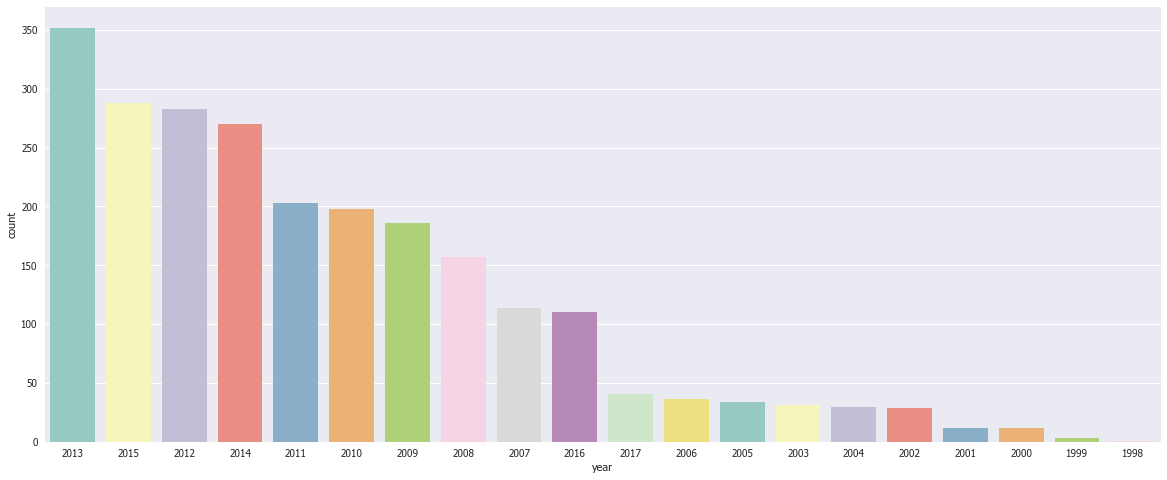

In [6]:
var = 'year'
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.countplot(x=var, data=df, order = df[var].value_counts().index, palette="Set3")
# plt.xticks(rotation=90);
plt.show()

In [7]:
df.groupby("year")["case_id"].count().reset_index(name='count').sort("count", ascending=False)

/Users/mikephul/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,year,count
15,2013,352
17,2015,288
14,2012,283
16,2014,270
13,2011,203
12,2010,198
11,2009,186
10,2008,157
9,2007,114
18,2016,110


## The most reported corruption month

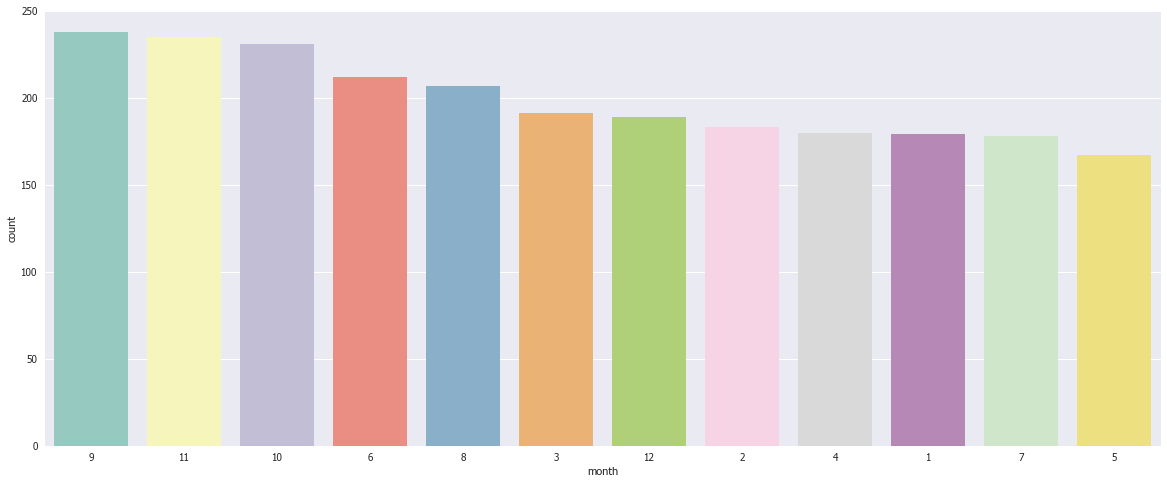

In [20]:
var = 'month'
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.countplot(x=var, data=df, order = df[var].value_counts().index, palette="Set3")
# plt.xticks(rotation=90);
plt.show()

In [21]:
df.groupby("month")["case_id"].count().reset_index(name='count').sort("count", ascending=False)

/Users/mikephul/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,month,count
8,9,238
10,11,235
9,10,231
5,6,212
7,8,207
2,3,191
11,12,189
1,2,183
3,4,180
0,1,179


## The most reported corruption departments

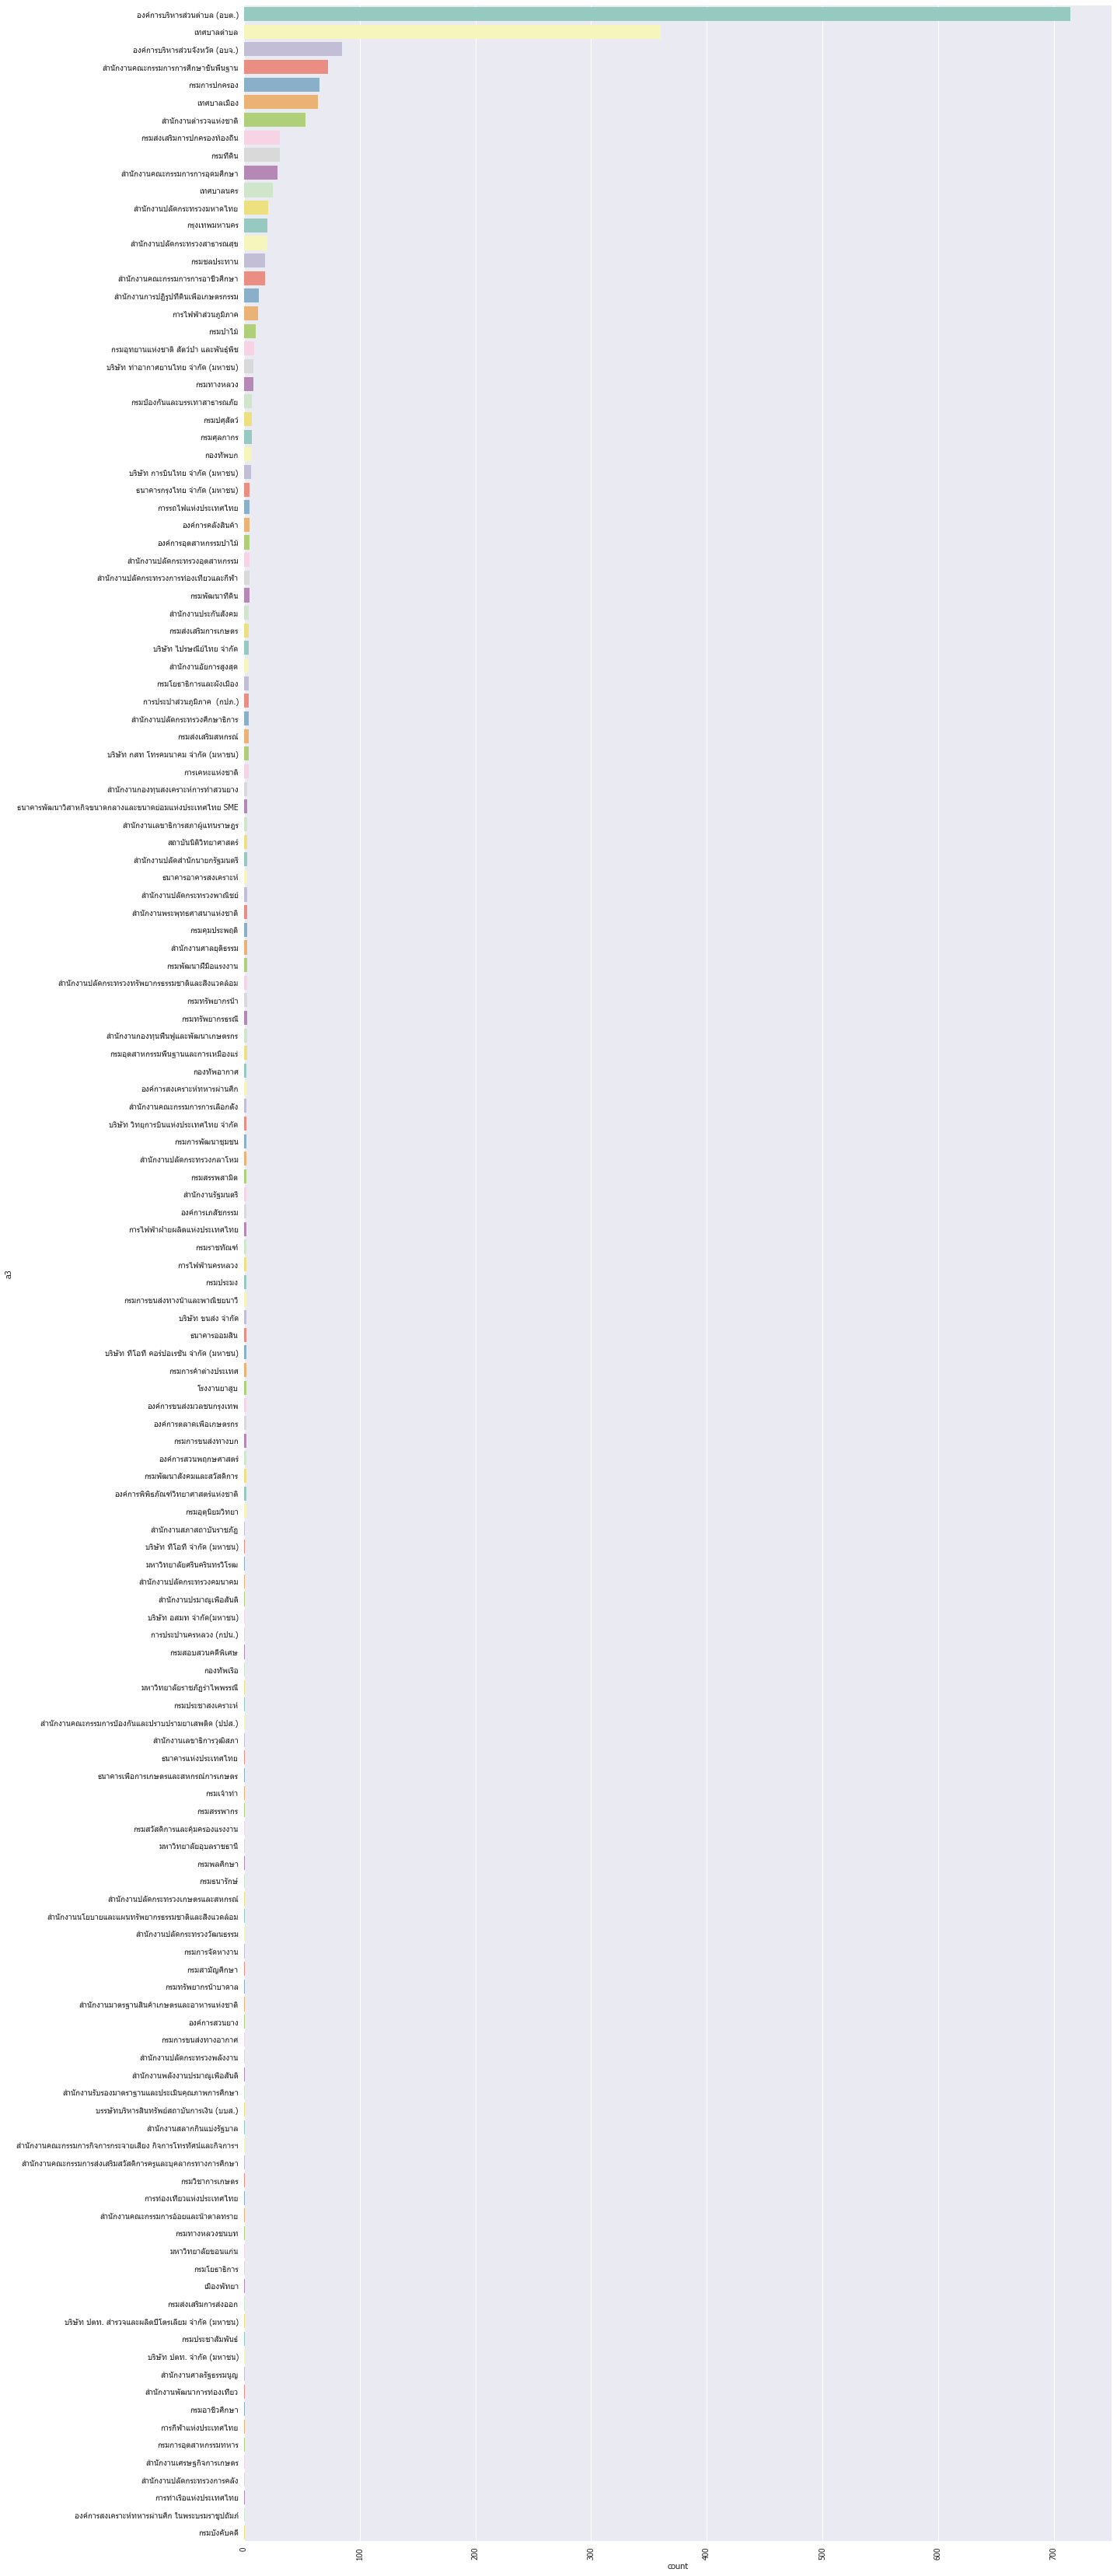

In [8]:
var = 'a3'
f, ax = plt.subplots(figsize=(20, 60))
fig = sns.countplot(y=var, data=df, order = df[var].value_counts().index, palette="Set3")
plt.xticks(rotation=90);
plt.show()

In [9]:
df.groupby("a3")["case_id"].count().reset_index(name='count').sort("count", ascending=False)

/Users/mikephul/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,a3,count
131,องค์การบริหารส่วนตำบล (อบต.),714
139,เทศบาลตำบล,360
130,องค์การบริหารส่วนจังหวัด (อบจ.),85
87,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,73
5,กรมการปกครอง,65
141,เทศบาลเมือง,64
95,สำนักงานตำรวจแห่งชาติ,53
36,กรมส่งเสริมการปกครองท้องถิ่น,31
15,กรมที่ดิน,31
89,สำนักงานคณะกรรมการการอุดมศึกษา,29


## The most reported corrupt ministry

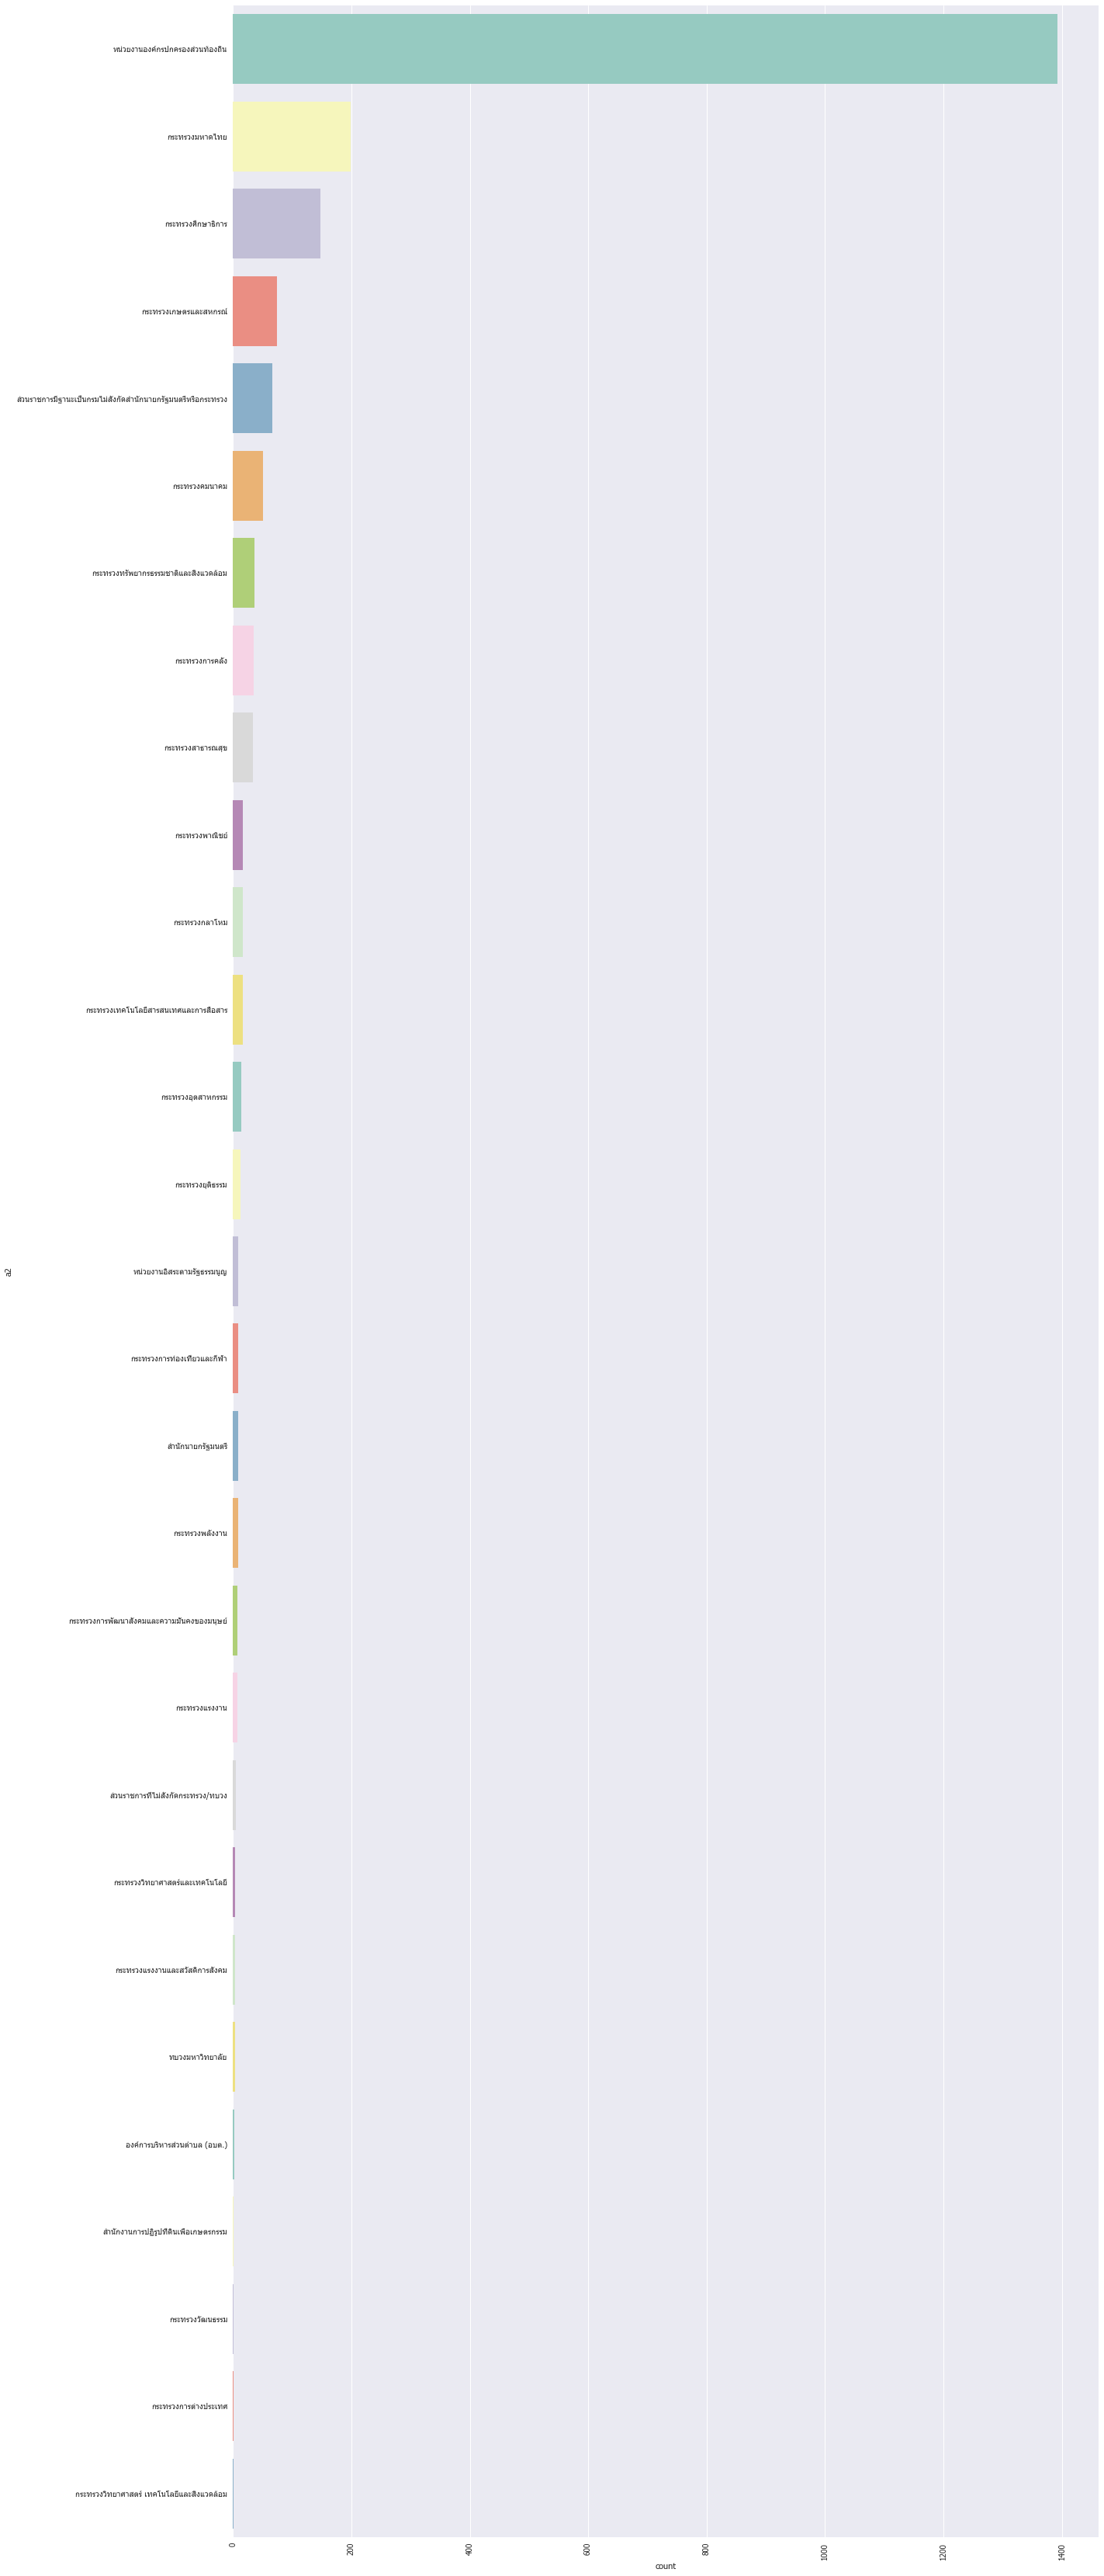

In [10]:
var = 'a2'
f, ax = plt.subplots(figsize=(20, 60))
fig = sns.countplot(y=var, data=df, order = df[var].value_counts().index, palette="Set3")
plt.xticks(rotation=90);
plt.show()

In [11]:
df.groupby("a2")["case_id"].count().reset_index(name='count').sort("count", ascending=False)

/Users/mikephul/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,a2,count
26,หน่วยงานองค์กรปกครองส่วนท้องถิ่น,1393
9,กระทรวงมหาดไทย,199
14,กระทรวงศึกษาธิการ,148
17,กระทรวงเกษตรและสหกรณ์,74
25,ส่วนราชการมีฐานะเป็นกรมไม่สังกัดสำนักนายกรัฐมนตรีหรือกระทรวง,67
5,กระทรวงคมนาคม,51
6,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,36
1,กระทรวงการคลัง,35
15,กระทรวงสาธารณสุข,34
0,กระทรวงกลาโหม,17


## Most reported corrupted title

In [15]:
df.groupby("a1")["case_id"].count().reset_index(name='count').sort("count", ascending=False)

/Users/mikephul/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,a1,count
1691,หัวหน้าส่วนการคลัง,13
1912,เจ้าหน้าที่พัสดุ,8
573,นายกองค์การบริหารส่วนตำบลคู้สลอด,8
814,นายกเทศมนตรีตำบลท่าสายลวด,7
535,นายกรัฐมนตรี,6
283,นายก อบต.บางรักพัฒนา,6
555,นายกองค์การบริหารส่วนตำบลกมลา,5
148,นายก ทต.หนองกี่,5
818,นายกเทศมนตรีตำบลนาขาม,4
533,นายก อบต.ไร่,4


## Status of most cases

- 32 % of the cases have no status updated

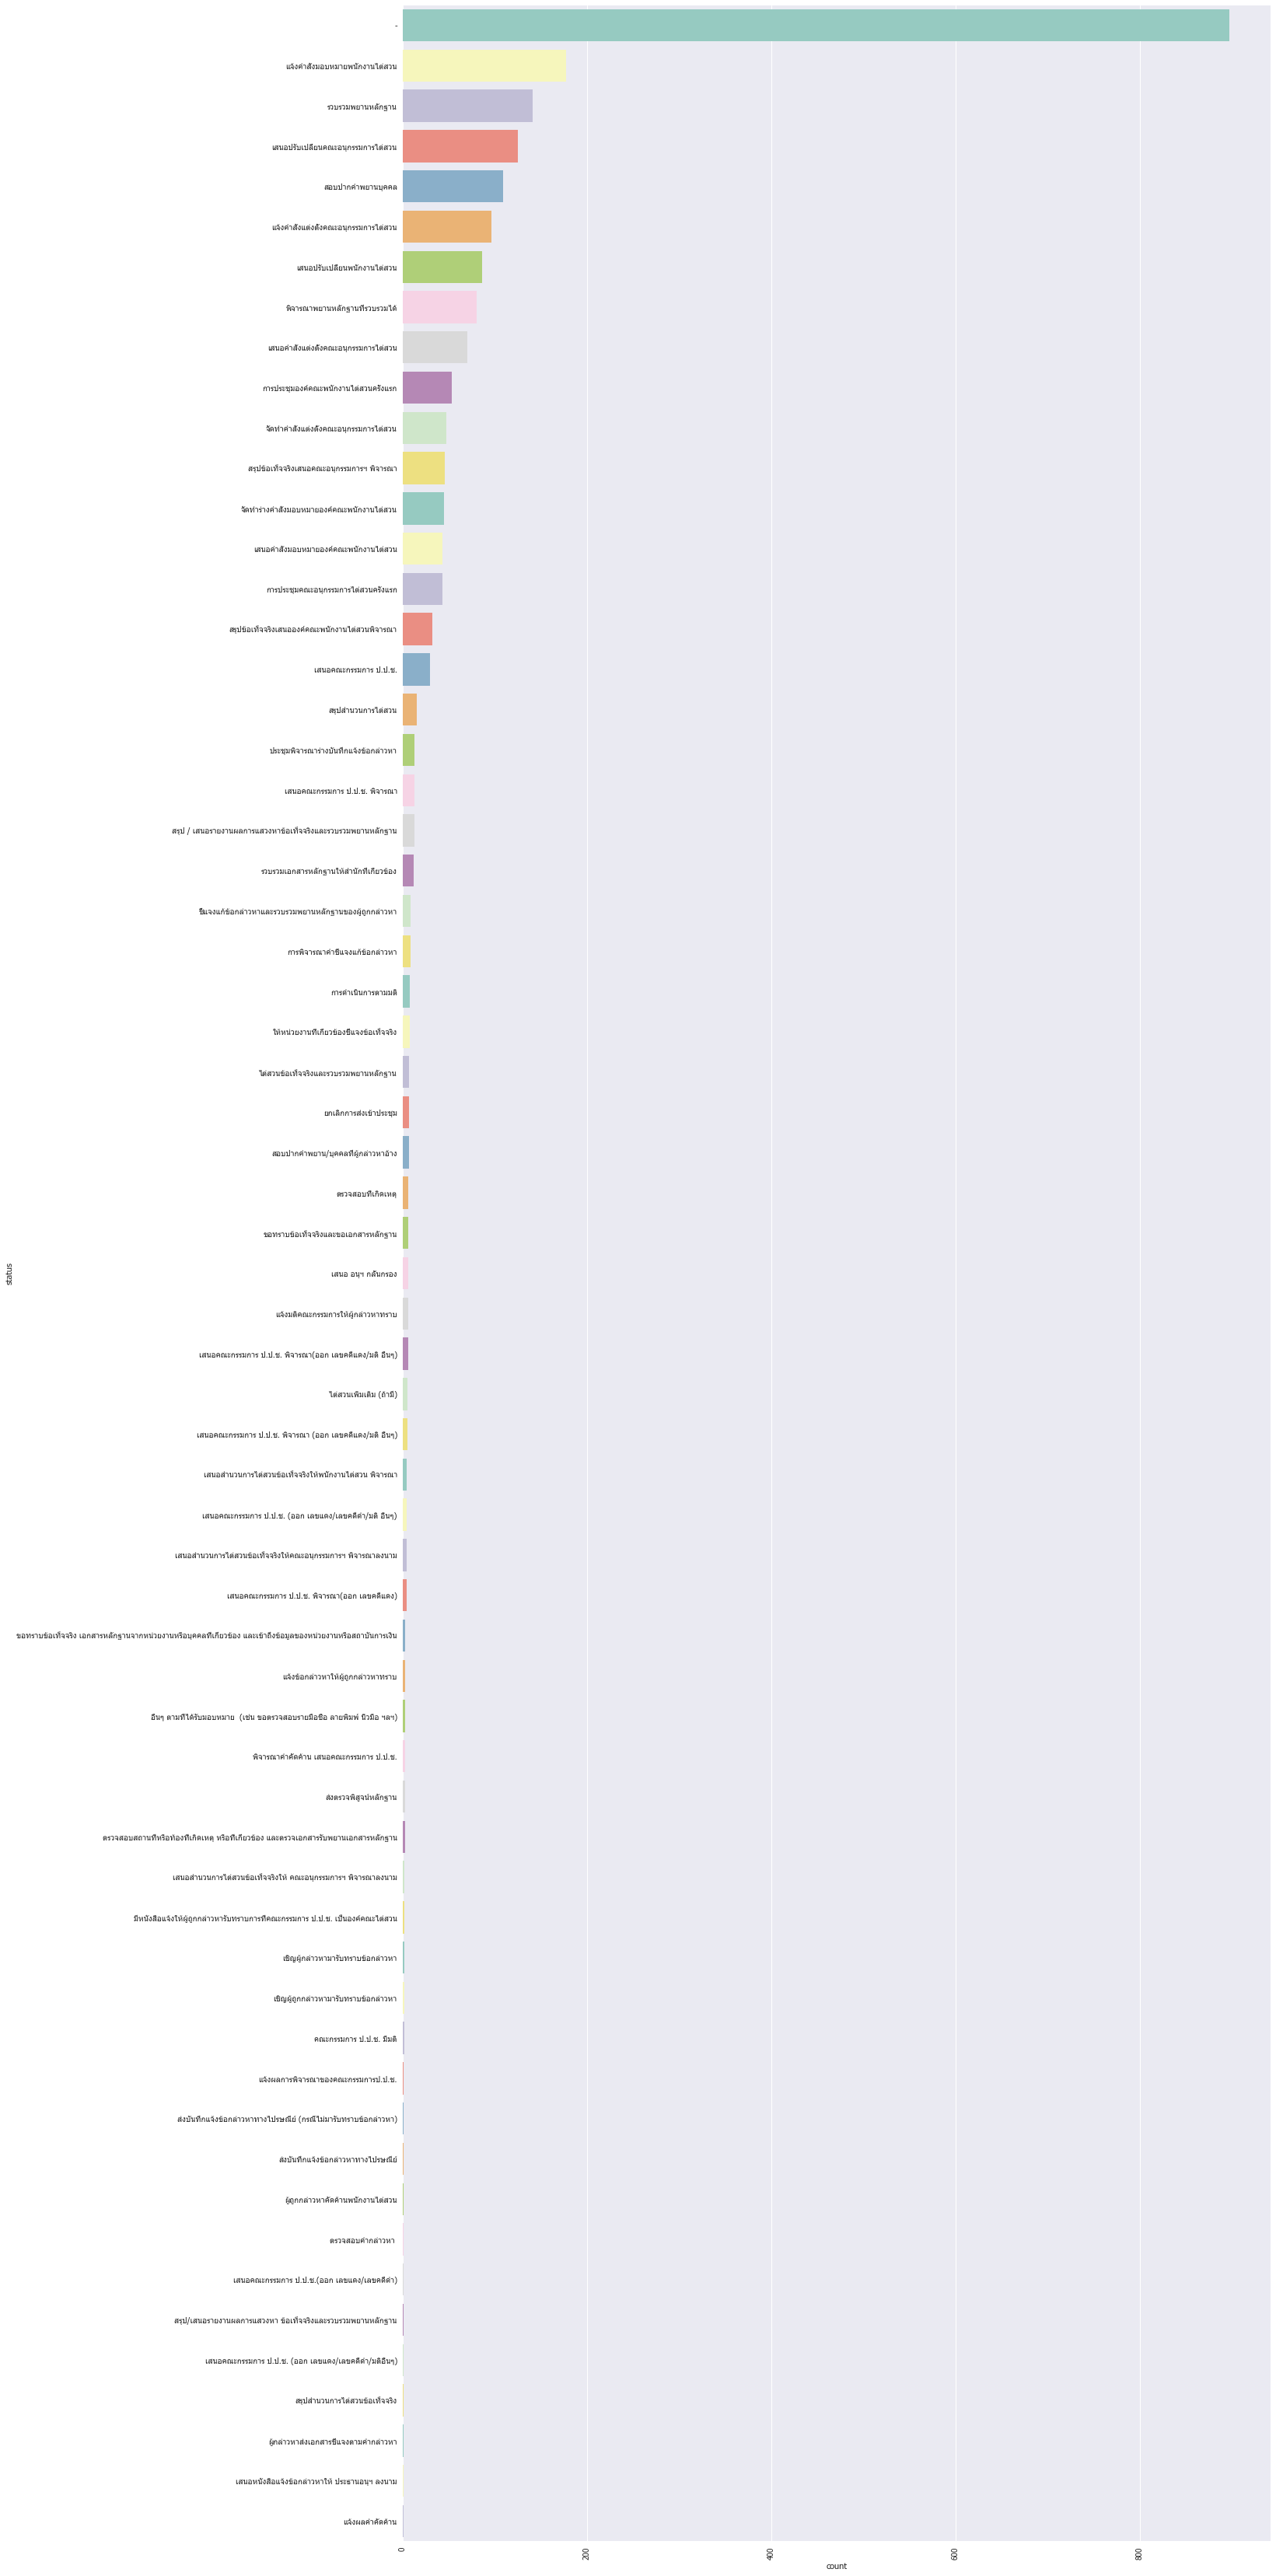

In [236]:
var = 'status'
f, ax = plt.subplots(figsize=(20, 60))
fig = sns.countplot(y=var, data=df, order = df[var].value_counts().index, palette="Set3")
plt.xticks(rotation=90);
plt.show()

In [244]:
df.groupby("status")["case_id"].count().reset_index(name='count').sort("count", ascending=False)

/Users/mikephul/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,status,count
0,-,897
55,แจ้งคำสั่งมอบหมายพนักงานไต่สวน,177
21,รวบรวมพยานหลักฐาน,141
48,เสนอปรับเปลี่ยนคณะอนุกรรมการไต่สวน,125
30,สอบปากคำพยานบุคคล,109
56,แจ้งคำสั่งแต่งตั้งคณะอนุกรรมการไต่สวน,96
49,เสนอปรับเปลี่ยนพนักงานไต่สวน,86
18,พิจารณาพยานหลักฐานที่รวบรวมได้,80
47,เสนอคำสั่งแต่งตั้งคณะอนุกรรมการไต่สวน,70
3,การประชุมองค์คณะพนักงานไต่สวนครั้งแรก,53


In [22]:
# joke1 = df.groupby("a3")["case_id"].count().reset_index(name='count')

In [23]:
# joke1 = joke1.sort('count', ascending=False)

In [24]:
# from bokeh.charts import Bar, output_file, show
# from bokeh.sampledata.autompg import autompg as df
# from bokeh.models import HoverTool

# p = Bar(joke1, 'a3', values='count', title="Total MPG by CYL", legend=False)

# tooltips = HoverTool(
# tooltips=[
#     ("a3", "@a3"),
#     ("count", "@count")
#     ]
# )

# p.add_tools(tooltips)
# output_file("bar.html")

# show(p)

## Tokenize Data

In [4]:
tk = pd.read_csv("tokenize_df.csv")
del tk["Unnamed: 0"]

In [13]:
import ast
arr = []

for sentence in tk["case_token"]:
    for word in ast.literal_eval(sentence):
        arr.append(word)    

In [3]:

from wordcloud import WordCloud
wordcloud = WordCloud(font_path='SukhumvitSet-Bold.ttf').generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'text' is not defined

In [18]:
j = ' '.join(arr)

In [19]:
j

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
